In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
D_cust = pd.read_csv('customers.csv')
D_cust.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [425]:
D_cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [426]:
D_cust.isnull().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

Terdapat data null pada kolom gender

In [427]:
print("Jumlah duplikasi:", D_cust.duplicated().sum())
D_cust.describe()

Jumlah duplikasi: 6


,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


Inaccurate value = Masalah yang muncul ketika nilai dalam sebuah data tidak sesuai dengan hasil observasi.
terjadi pada kolom age 'max'

Terdapat 6 data duplikasi

### Cleaning data

In [428]:
# Menghapus data duplikat
D_cust.drop_duplicates(inplace= True)
print("data duplikasi:", D_cust.duplicated().sum())

data duplikasi: 0


In [429]:
# Mengatasi missing value
D_cust[D_cust.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [430]:
# Mengecek data pada gender
D_cust.gender.value_counts()

gender
Prefer not to say    725
Male                 143
Female               115
Name: count, dtype: int64

In [431]:
#Mengganti missing value dengan data paling dominan menggunakan manipulation data
D_cust.fillna(value='Prefer not to say', inplace= True)

In [432]:
D_cust.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

membetulkan data inaccurate value

In [433]:
# Memeriksa data inaccurate value
D_cust[D_cust.age == D_cust.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [434]:
D_cust.age.replace(D_cust.age.max(), 70, inplace= True)

C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\3325037848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  D_cust.age.replace(D_cust.age.max(), 70, inplace= True)


In [435]:
D_cust[D_cust.age == D_cust.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [436]:
D_cust.age.replace(D_cust.age.max(),50, inplace=True)

C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\963368506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  D_cust.age.replace(D_cust.age.max(),50, inplace=True)


In [437]:
D_cust.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


Checking data order

In [438]:
D_orders = pd.read_csv('orders.csv')
D_orders.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [439]:
D_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


Kesalahan tipe data delivery date

In [440]:
D_orders.isnull().sum()

order_id         0
customer_id      0
payment          0
order_date       0
delivery_date    0
dtype: int64

In [441]:
print("jumlah duplikasi:", D_orders.duplicated().sum())
D_orders.describe()

jumlah duplikasi: 0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


Memperbaiki tipe data date

In [442]:
# Mengubah dari tipe data objek menjadi date time
Dt = ["order_date", "delivery_date"]
for column in Dt:
    D_orders[column]= pd.to_datetime(D_orders[column])

In [443]:
D_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


Checking data product

In [444]:
D_product = pd.read_csv('products.csv')
D_product.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [445]:
D_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [446]:
D_product.isnull().sum()

product_id      0
product_type    0
product_name    0
size            0
colour          0
price           0
quantity        0
description     0
dtype: int64

In [530]:
print("jumlah duplikasi:", D_product.duplicated().sum())
D_product.describe()

jumlah duplikasi: 6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


Terdapat 6 data duplikasi

Cleaning data duplikat

In [448]:
D_orders.drop_duplicates(inplace=True)
print("Jumlah duplikasi:", D_orders.duplicated().sum())

Jumlah duplikasi: 0


Checking data sales

In [449]:
D_sales = pd.read_csv('sales.csv')
D_sales.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


In [450]:
D_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [451]:
D_sales.isnull().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

terdpat 19 data null pada kolom total price

In [452]:
print("Data duplikasi:", D_sales.duplicated().sum())
D_sales.describe()

Data duplikasi: 0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Cleaning null value

In [453]:
D_sales[D_sales.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [454]:
D_sales["total_price"] = D_sales["price_per_unit"] * D_sales["quantity"]

In [455]:
D_sales.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

# Eksplorasi Data Analysis (EDA)

In [456]:
D_cust.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
795,792,fulan 792,Prefer not to say,56,76 Kiara RidgeSuite 741,4363,New Marcusmouth,Western Australia,Australia
421,421,fulan 421,Prefer not to say,62,35 Robinson Station StSuite 547,5382,North Baileyside,Australian Capital Territory,Australia
842,839,fulan 839,Female,20,18 Patrick RidgeApt. 675,9673,Georgeshire,Northern Territory,Australia
199,200,fulan 200,Prefer not to say,68,3468 Christiansen MeadowSuite 298,4072,Evamouth,Australian Capital Territory,Australia
304,305,fulan 305,Prefer not to say,25,0052 Benjamin MewsApt. 635,7024,Lake Aidan,Australian Capital Territory,Australia


In [457]:
D_cust.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Insight: Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup luas mulai dari remaja hingga lanjut usia.

In [458]:
D_cust.customer_id.is_unique

False

In [459]:
D_cust.customer_id.duplicated

<bound method Series.duplicated of 0          1
1          2
2          3
3          4
4          5
        ... 
1002     996
1003     997
1004     998
1005     999
1006    1000
Name: customer_id, Length: 1001, dtype: int64>

In [460]:
D_cust.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max","min","mean","std"]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang kita miliki didominasi oleh jenis kelamin prefer not to say. Di lain sisi, distribusi umur mereka ternyata cukup mirip yaitu berkisar antara 20 hingga 80 tahun.

In [461]:
D_cust.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [462]:
D_cust.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

Insight: Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota East Aidan, East Sophia, dan New Ava dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian South Australia.

Eksplorasi data order

In [463]:
D_orders.sample(5)

,order_id,customer_id,payment,order_date,delivery_date
674,675,896,43080,2021-06-05,2021-06-13
207,208,28,39533,2021-10-10,2021-10-15
828,829,951,22744,2021-04-06,2021-04-28
41,42,690,33993,2021-07-29,2021-08-02
597,598,638,59393,2021-06-20,2021-07-05


In [464]:
Delivery_time = D_orders["delivery_date"] - D_orders["order_date"]
Delivery_time = Delivery_time.apply(lambda x: x.total_seconds())
D_orders["Delivery_time"] = round(Delivery_time/86400)

In [465]:
D_orders.sample(5)

,order_id,customer_id,payment,order_date,delivery_date,Delivery_time
731,732,40,40317,2021-05-09,2021-05-29,20.0
580,581,708,35176,2021-05-09,2021-05-29,20.0
864,865,490,24343,2021-07-27,2021-07-30,3.0
193,194,415,21994,2021-10-23,2021-11-03,11.0
101,102,846,41382,2021-05-07,2021-05-26,19.0


In [466]:
D_orders.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,Delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


Insight: Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari. 

Eksplorasi Data orders_df dan customers_df

In [467]:
D_orders.sample(5)

,order_id,customer_id,payment,order_date,delivery_date,Delivery_time
758,759,857,18160,2021-06-06,2021-07-03,27.0
328,329,820,58708,2021-04-30,2021-05-24,24.0
916,917,750,15620,2021-01-02,2021-01-12,10.0
880,881,318,51945,2021-02-18,2021-03-10,20.0
216,217,234,47120,2021-07-18,2021-07-31,13.0


In [468]:
D_cust.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
410,410,fulan 410,Prefer not to say,64,77 Graham AvenueSuite 070,7356,Boyerville,Victoria,Australia
822,819,fulan 819,Prefer not to say,56,0486 Connelly MeadowApt. 273,246,West Heidiberg,Queensland,Australia
838,835,fulan 835,Prefer not to say,25,69 Morissette AvenueSuite 269,6147,North Lachlanfurt,South Australia,Australia
771,769,fulan 769,Male,21,1621 Marcus MeadowApt. 603,8190,West Grace,Australian Capital Territory,Australia
55,56,fulan 56,Prefer not to say,33,673 Amelie MewsApt. 346,6829,Brownburgh,New South Wales,Australia


In [469]:
customer_id_in_D_order = D_orders.customer_id.tolist()
D_cust["status"] = D_cust["customer_id"].apply(lambda x: "active" if x in customer_id_in_D_order else "non active")
D_cust.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
45,46,fulan 46,Prefer not to say,68,708 Daniel MeadowSuite 246,5087,Bartolettiside,Australian Capital Territory,Australia,active
418,418,fulan 418,Prefer not to say,57,855 Beahan IslandSuite 560,2775,North Sebastianberg,Australian Capital Territory,Australia,active
950,944,fulan 944,Prefer not to say,36,409 Alyssa CourtApt. 204,8196,Walterland,Victoria,Australia,active
784,781,fulan 781,Prefer not to say,36,2785 Morgan BoulevardApt. 849,6220,Madisonland,Victoria,Australia,active
650,649,fulan 649,Prefer not to say,74,3796 Kayla RoadSuite 477,5825,Schneiderbury,Northern Territory,Australia,active


In [470]:
D_cust.groupby(by="status").customer_id.count()

status
active        617
non active    384
Name: customer_id, dtype: int64

Seperti yang terlihat pada pivot table di atas, terdapat cukup banyak pelanggan yang belum pernah melakukan transaksi sebelumnya. Ini tentunya merupakan kabar buruk bagi kita karena hampir 30% pelanggan kita belum pernah melakukan order sebelumnya.

In [471]:
Order_cust = pd.merge(
    left= D_orders,
    right= D_cust,
    how= "left",
    left_on= "customer_id",
    right_on= "customer_id"
)
Order_cust.sample(5)

,order_id,customer_id,payment,order_date,delivery_date,Delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
49,50,454,50310,2021-09-16,2021-09-18,2.0,fulan 454,Prefer not to say,28,3543 Jack GroveApt. 595,3276,Port Isabellafurt,New South Wales,Australia,active
775,776,265,44395,2021-09-02,2021-09-27,25.0,fulan 265,Male,52,35 Baumbach HillApt. 244,5072,Lake Laurenview,Tasmania,Australia,active
111,112,75,46956,2021-02-04,2021-02-17,13.0,fulan 75,Prefer not to say,75,96 Caitlin HillSuite 366,9777,Smythland,South Australia,Australia,active
751,752,535,46911,2021-10-08,2021-10-12,4.0,fulan 535,Prefer not to say,56,0872 Gemma ParadeApt. 070,6593,Conroychester,South Australia,Australia,active
456,457,490,52472,2021-03-04,2021-03-12,8.0,fulan 490,Male,57,74 King SummitSuite 021,7633,Mollyland,New South Wales,Australia,active


In [472]:
Order_cust.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


berdasarkan hasil tersebut, diketahui bahwa kota Jordanside dan New Ava merupakan dua kota yang memiliki jumlah order terbanyak.

In [473]:
Order_cust.groupby(by="state").order_id.nunique().sort_values(ascending=False).reset_index()

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


Berdasarkan pivot table tersebut, diketahui bahwa South Australia merupakan state yang paling banyak melakukan order.

In [474]:
Order_cust.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

Berdasarkan hasil tersebut, dapat dilihat bahwa kebanyakan order dilakukan oleh pelanggan yang berjenis kelamin prefer not to say. Hal ini tentunya sejalan dengan jumlah pelanggan yang kebanyakan dari kelompok gender tersebut.

In [475]:
Order_cust["age_group"] = Order_cust.age.apply(lambda x: "youth" if x <= 24 else("senior" if x > 64 else "adult"))
Order_cust.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
adult     681
senior    226
youth      93
Name: order_id, dtype: int64

Berdasarkan hasil tersebut diketahui bahwa pelanggan yang paling banyak melakukan order berasal dari kelompok usia Adults.

In [476]:
D_product.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1266.000000,1266,1266,1266,1266,1266.000000,1266.000000,1266
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,S,orange,NaN,NaN,"A orange coloured, S sized, Linen Shirt"
freq,NaN,424,70,253,182,NaN,NaN,3
mean,627.926540,NaN,NaN,NaN,NaN,105.812006,60.138231,NaN
std,363.971586,NaN,NaN,NaN,NaN,9.715611,11.682791,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,313.250000,NaN,NaN,NaN,NaN,95.250000,50.000000,NaN
50%,626.500000,NaN,NaN,NaN,NaN,109.000000,60.000000,NaN
75%,942.750000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [477]:
D_sales.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [478]:
D_product.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
952,946,Trousers,Slim-Fit,S,red,119,71,"A red coloured, S sized, Slim-Fit Trousers"
678,672,Jacket,Parka,M,orange,119,51,"A orange coloured, M sized, Parka Jacket"
677,671,Jacket,Parka,S,orange,119,72,"A orange coloured, S sized, Parka Jacket"
676,670,Jacket,Parka,XS,orange,119,53,"A orange coloured, XS sized, Parka Jacket"
675,669,Jacket,Parka,XL,red,119,64,"A red coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1218,1212,Trousers,Pleated,M,blue,90,66,"A blue coloured, M sized, Pleated Trousers"
1217,1211,Trousers,Pleated,S,blue,90,60,"A blue coloured, S sized, Pleated Trousers"
1216,1210,Trousers,Pleated,XS,blue,90,62,"A blue coloured, XS sized, Pleated Trousers"
1215,1209,Trousers,Pleated,XL,green,90,55,"A green coloured, XL sized, Pleated Trousers"


Dapat dilihat bahwa produk termahal ialah item jaket bernama Parka dan yang termurah bernama Bomber.



In [479]:
D_product.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min","max"]
})


product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25527    90  119
Shirt               420    25469    92  119
Trousers            420    25139    90  119

In [480]:
D_product.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min","max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2162    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2177   119  119
Flannel                   35     2135    96   96
Henley                    35     2121    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2222   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     2007   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

Pivot table di atas dapat memberikan kita gambaran terkait produk yang dijual oleh Dicoding Collection. Sebagai calon praktisi data yang Andal, tentunya Anda penasaran dengan produk yang paling laris. Nah, untuk menjawab pertanyaan ini, kita perlu menyatukan (merge) tabel product_df dan sales_df dengan kode berikut.

In [481]:
Sales_produk = pd.merge(
    left=D_sales,
    right=D_product,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
Sales_produk.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan kembali, hasil dari proses merge di atas memiliki perbedaan antara nilai price_per_unit dan price. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, dan biaya lainnya. 

In [482]:
Sales_produk.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3375,360370
Shirt,1641,3279,335452
Trousers,1683,3360,341174


Jika Anda perhatikan pivot table di atas, Trousers merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan. 

In [483]:
Sales_produk.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
    
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Puffer,140,306,36108
Trench Coat,146,299,35581
Shearling,150,302,35334
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Bomber,150,321,32100


Berdasarkan pivot table tersebut, diketahui bahwa produk Denim merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.  

In [484]:
all_D = pd.merge(
    left= Sales_produk,
    right= Order_cust,
    how= "left",
    left_on= "order_id",
    right_on= "order_id"
)
pd.set_option('display.max_columns',50)
all_D.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description,customer_id,payment,order_date,delivery_date,Delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,active,senior
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,active,senior
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,active,senior
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,active,senior
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,active,senior


In [485]:
all_D.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "price": "sum"
})

quantity_x  price
state                        product_type                   
Australian Capital Territory Jacket               411  22127
                             Shirt                397  22003
                             Trousers             454  23489
New South Wales              Jacket               456  25014
                             Shirt                443  24453
                             Trousers             392  19855
Northern Territory           Jacket               365  19104
                             Shirt                338  17501
                             Trousers             384  19547
Queensland                   Jacket               509  27160
                             Shirt                417  23230
                             Trousers             453  22802
South Australia              Jacket               462  24423
                             Shirt                509  27852
                             Trousers             455  23364
Tasmania                     Jacket               419  22797
                             Shirt                388  20726
                             Trousers             379  18989
Victoria                     Jacket               362  19489
                             Shirt                394  22254
                             Trousers             414  20789
Western Australia            Jacket               391  21035
                             Shirt                393  20753
                             Trousers             429  22027

Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya. Jika diperhatikan, tipe produk Jacket (garis merah) paling banyak terjual pada negara bagian Queensland, South Australia, dan New South Wales. Untuk tipe produk lain, Anda bisa melihatnya pada gambar pivot table di atas. 

In [486]:
all_D.groupby(by=["gender","product_type"]).agg({
    "quantity_x": "sum",
    "price": "sum"
})

quantity_x   price
gender            product_type                    
Female            Jacket               492   26699
                  Shirt                445   24840
                  Trousers             481   24064
Male              Jacket               486   26169
                  Shirt                422   22528
                  Trousers             453   23272
Prefer not to say Jacket              2397  128281
                  Shirt               2412  131404
                  Trousers            2426  123526

In [487]:
all_D.groupby(by=["age_group","product_type"]).agg({
    "quantity_x": "sum",
    "price": "sum"
})

quantity_x   price
age_group product_type                    
adult     Jacket              2312  124718
          Shirt               2233  121406
          Trousers            2272  115180
senior    Jacket               786   41199
          Shirt                745   40229
          Trousers             766   38956
youth     Jacket               277   15232
          Shirt                301   17137
          Trousers             322   16726

# Visualisasi data

1.Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

2.Produk apa yang paling banyak dan paling sedikit terjual?

3.Bagaimana demografi pelanggan yang kita miliki?

4.Kapan terakhir pelanggan melakukan transaksi?

5.Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

6.Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

1.Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [488]:
R_LastM = all_D.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
R_LastM.index = R_LastM.index.strftime('%B') #Mengubah format menjadi bulan
R_LastM = R_LastM.reset_index()
R_LastM.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace= True)
R_LastM.head()

C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\3420538740.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  R_LastM = all_D.resample(rule='M', on='order_date').agg({


,order_date,order_count,revenue
0,January,109,119851
1,February,93,95480
2,March,117,131600
3,April,99,98230
4,May,84,86631


<function matplotlib.pyplot.show(close=None, block=None)>

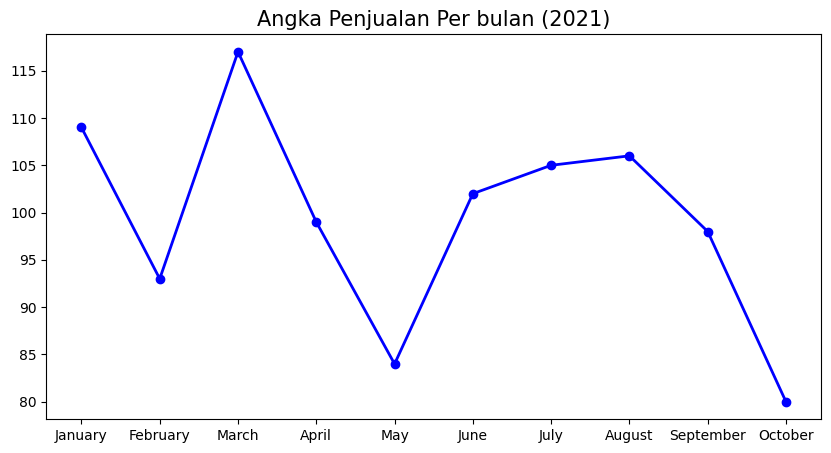

In [489]:
plt.figure(figsize=(10, 5))
plt.plot(
    R_LastM["order_date"],
    R_LastM["order_count"],
    marker='o',
    linewidth=2,
    color="blue"
)
plt.title("Angka Penjualan Per bulan (2021)", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan Maret. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Februari, April, Mei, dan Oktober.

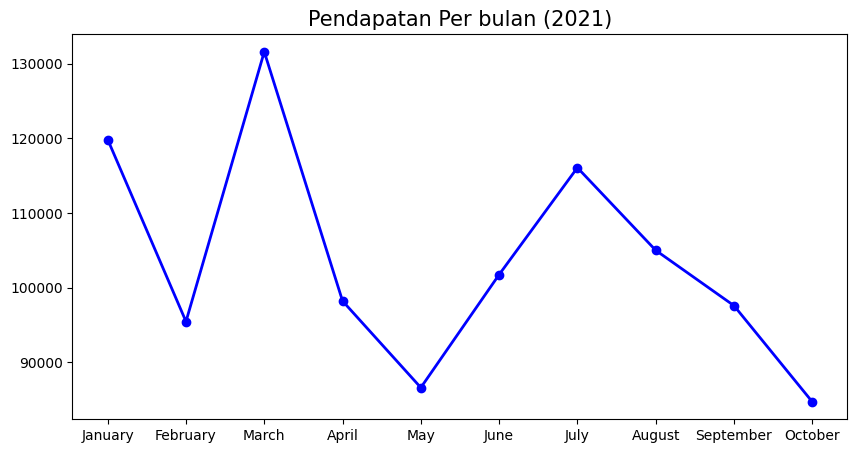

In [490]:
plt.figure(figsize=(10, 5))
plt.plot(
    R_LastM["order_date"],
    R_LastM["revenue"],
    marker='o',
    linewidth=2,
    color="blue"
)
plt.title("Pendapatan Per bulan (2021)", fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

Penurunan jumlah orderan yang sangat signifikan terjadi pada bulan Februari, April, Mei, dan Oktober berdampak terhadap penurunan revenue perusahaan. Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll. Namun, untuk studi kasus ini, kita tidak memiliki cukup informasi terkait hal tersebut.

In [491]:
all_D.head(1)

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description,customer_id,payment,order_date,delivery_date,Delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,active,senior


2.Produk apa yang paling banyak dan paling sedikit terjual?

In [492]:
P_items = all_D.groupby(by=all_D["product_name"]).quantity_x.sum().sort_values(ascending= False).reset_index()
P_items.head()

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Bomber,321
3,Pleated,308
4,Casual Slim Fit,306


C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\1815689963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=P_items.head(5), palette= colors, ax=ax[0])
C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\1815689963.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=P_items.sort_values(by="quantity_x", ascending=True).head(5), palette=colors2, ax=ax[1])


<function matplotlib.pyplot.show(close=None, block=None)>

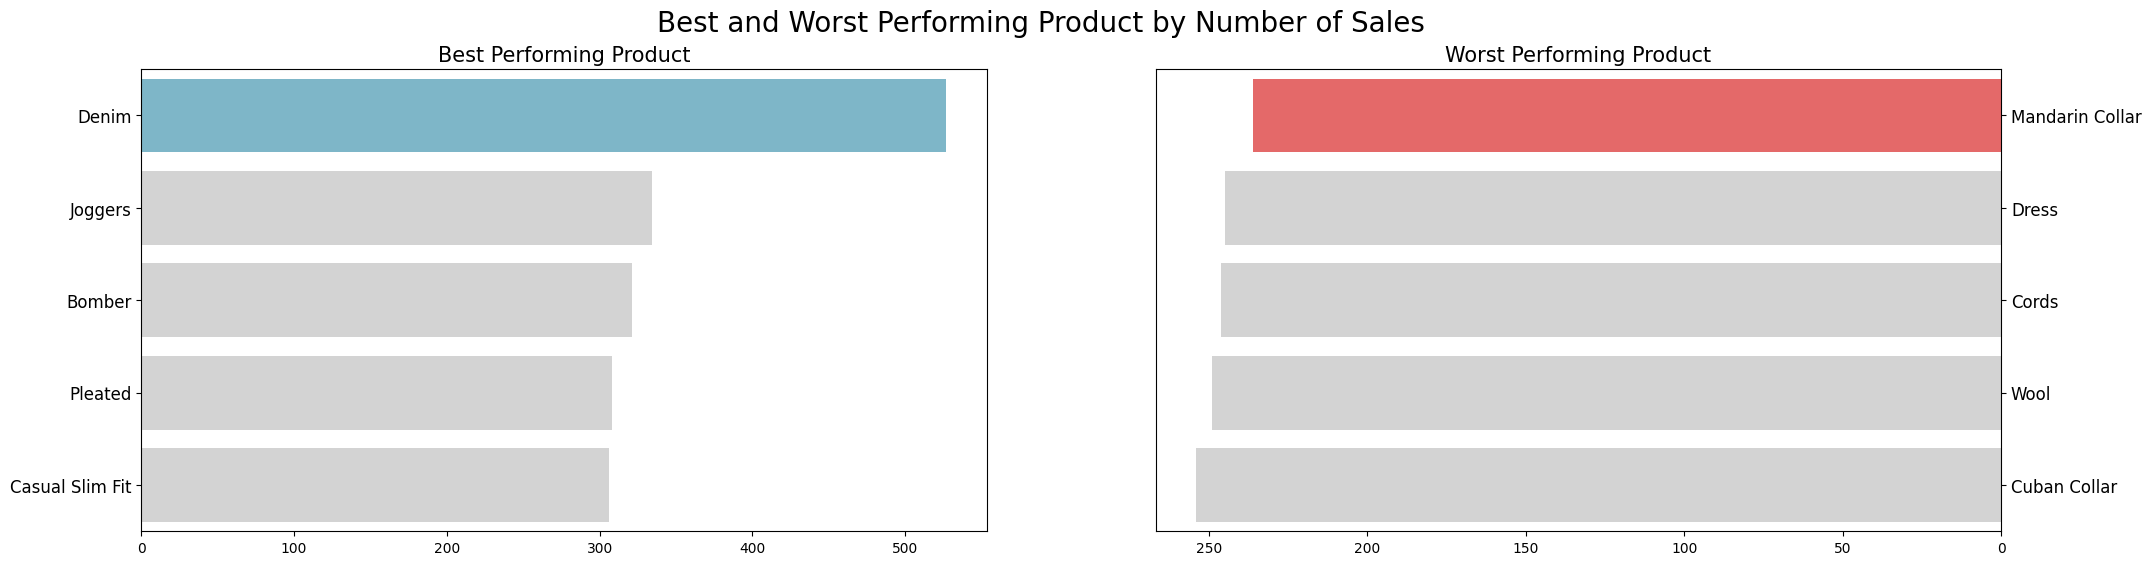

In [493]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["#F95454", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=P_items.head(5), palette= colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="quantity_x", y="product_name", data=P_items.sort_values(by="quantity_x", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show

Berdasarkan gambar di atas, Anda dapat melihat bahwa produk Denim merupakan produk yang paling laris. Kontras dengan hal tersebut, produk Mandarin Collar merupakan produk yang paling sedikit terjual.  



In [494]:
by_gender= all_D.groupby(by="gender").customer_id.nunique().reset_index()
by_gender.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
by_gender.head()

,gender,customer_count
0,Female,73
1,Male,82
2,Prefer not to say,461


C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\271471746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\271471746.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


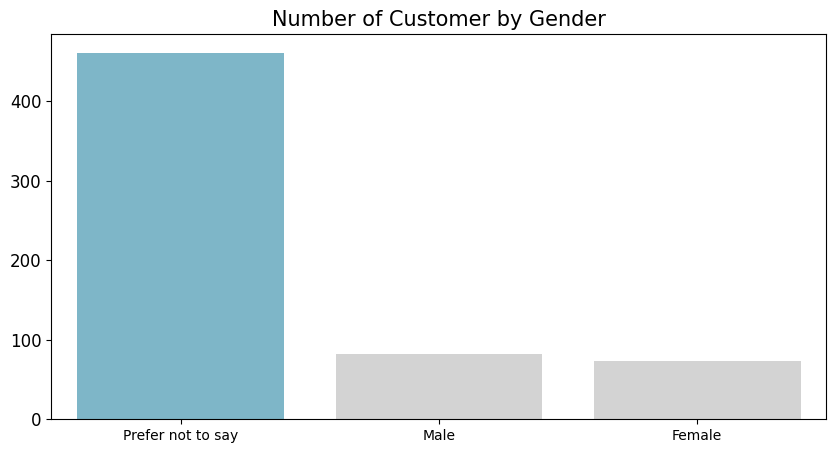

In [495]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="gender",
    data=by_gender.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", fontsize=15, loc="center")
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan tidak bersedia untuk memberitahukan informasi terkait gender-nya.

In [496]:
by_age = all_D.groupby(by="age_group").customer_id.nunique().reset_index()
by_age.rename(columns={
    "customer_id": "customer_count"
}, inplace= True)
by_age

,age_group,customer_count
0,adult,416
1,senior,145
2,youth,55


C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\500879802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\500879802.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


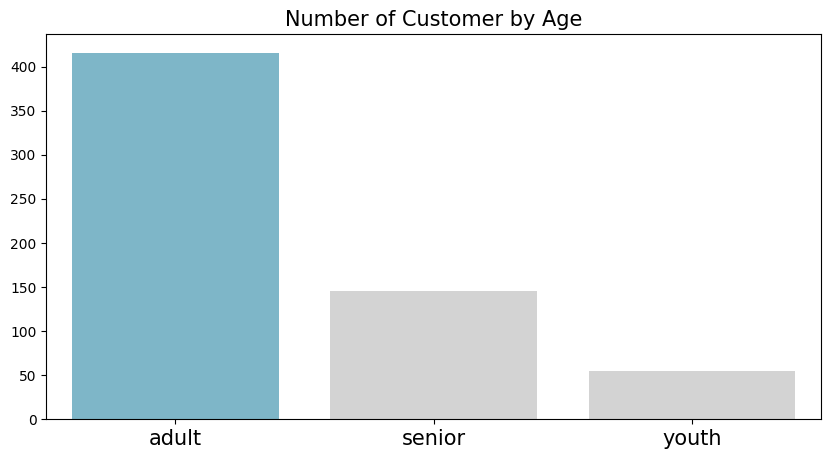

In [497]:
by_age['age_group'] = pd.Categorical(by_age["age_group"], ["adult", "senior", "youth"])
plt.figure(figsize=(10,5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=by_age.sort_values(by="age_group", ascending=False),
    palette= colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=15)
plt.show()

Seperti yang bisa Anda lihat, pelanggan yang kita miliki didominasi oleh kelompok usia dewasa.


In [498]:
by_state = all_D.groupby(by="state").customer_id.nunique().reset_index()
by_state.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
by_state

,state,customer_count
0,Australian Capital Territory,73
1,New South Wales,77
2,Northern Territory,75
3,Queensland,79
4,South Australia,90
5,Tasmania,67
6,Victoria,75
7,Western Australia,80


C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\194655618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


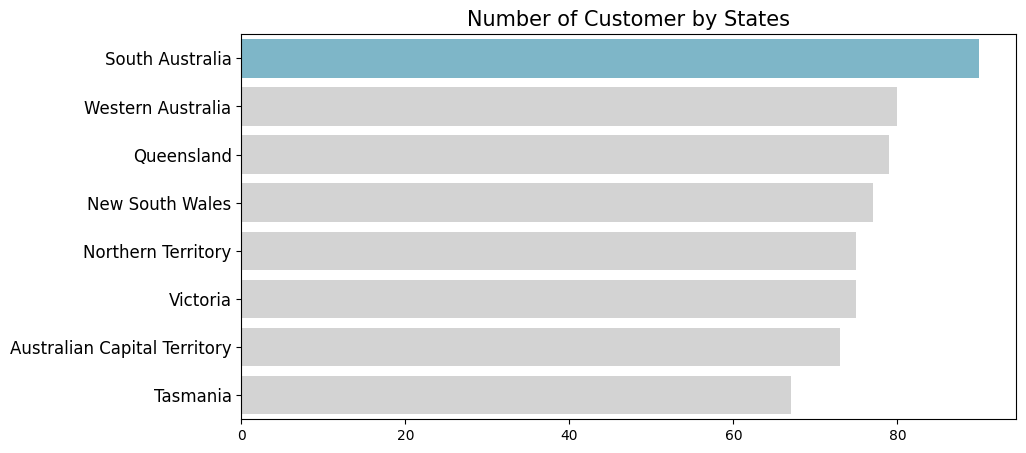

In [499]:
plt.figure(figsize=(10,5))
colors3 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count",
    y="state",
    data= by_state.sort_values(by="customer_count", ascending=False),
    palette= colors3
)
plt.title("Number of Customer by States", fontsize=15, loc="center")
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari negara bagian South Australia.

In [500]:
rfm_df = all_D.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max",
    "order_id": "nunique",
    "total_price": "sum"
})
rfm_df.columns= ["customer_id", "max_order", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order,frequency,monetary
0,1,2021-04-04,3,1641
1,7,2021-05-21,1,1017
2,10,2021-03-09,1,270
3,11,2021-05-28,1,382
4,12,2021-06-19,1,1551


In [501]:
rfm_df["max_order"]= rfm_df["max_order"].dt.date
recent_date = D_orders["order_date"].dt.date.max()
rfm_df["recency"]= rfm_df["max_order"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order,frequency,monetary,recency
0,1,2021-04-04,3,1641,203
1,7,2021-05-21,1,1017,156
2,10,2021-03-09,1,270,229
3,11,2021-05-28,1,382,149
4,12,2021-06-19,1,1551,127


In [502]:
rfm_df.drop("max_order", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


In [503]:
rfm_df.describe()

,customer_id,frequency,monetary,recency
count,616.00000,616.000000,616.000000,616.000000
mean,501.75974,1.612013,1683.435065,122.469156
std,286.16075,0.853754,1074.646027,84.326017
min,1.00000,1.000000,100.000000,0.000000
25%,259.50000,1.000000,878.250000,50.750000
50%,496.50000,1.000000,1465.500000,110.500000
75%,751.00000,2.000000,2175.000000,191.000000
max,1000.00000,6.000000,7632.000000,296.000000


In [504]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
241,401,4,3093,0
425,687,1,1122,0
426,690,3,3693,0
98,163,3,3494,1
250,415,2,2269,1


In [505]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
350,571,6,6640,66
212,348,5,5119,24
346,566,5,5671,5
409,664,5,6341,20
166,282,5,7632,63


C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_13764\2792759819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data= rfm_df.sort_values(by="recency", ascending=True).head(5),palette=colors ,ax=ax[0])


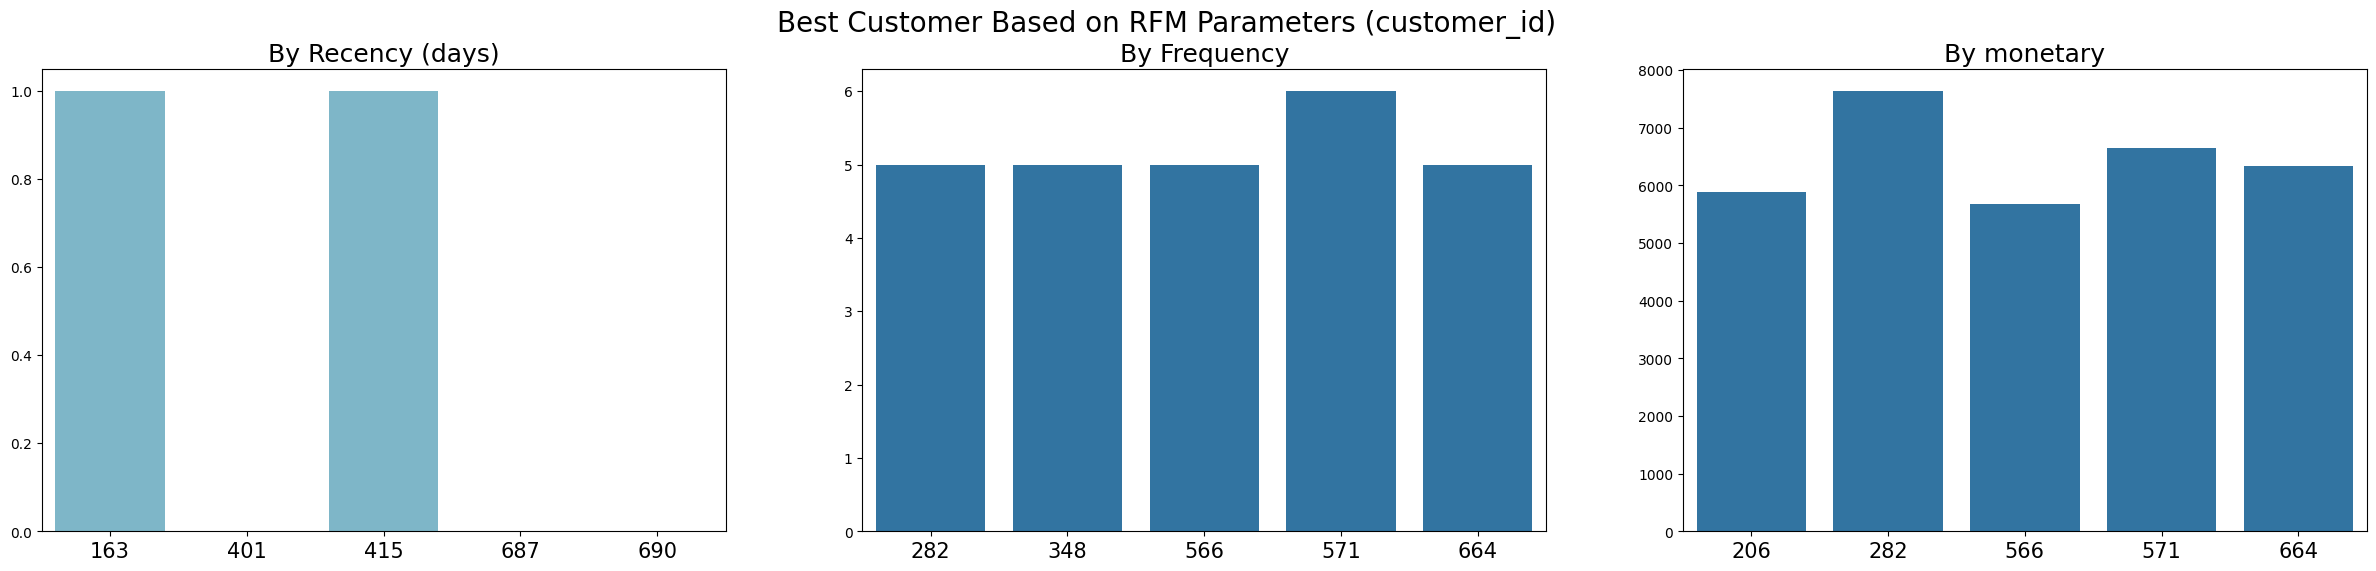

In [529]:
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(30,6))
colors=["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data= rfm_df.sort_values(by="recency", ascending=True).head(5),palette=colors ,ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data= rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("By Frequency", loc="center" ,fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].set_title("By monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Dari visualisasi data di atas, kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter tersebut.